파이토치(PyTorch) 튜토리얼
https://tutorials.pytorch.kr/


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [1]:
import torch

torch.__version__

'1.12.1+cu113'

In [ ]:
x = torch.rand(4,2)
x

tensor([[0.1417, 0.7816],
        [0.1170, 0.2641],
        [0.3864, 0.9549],
        [0.9241, 0.9218]])

In [ ]:
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
x = torch.tensor([3,2.3])
x

tensor([3.0000, 2.3000])

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
print(x.size())
print(x.shape)

torch.Size([2, 4])
torch.Size([2, 4])


| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)


tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# 0D Tensor
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


## 과제_1107_1 아래 Tensor들을 생성하세요.

In [ ]:
# 1D Tensor

In [ ]:
# 2D Tensor

In [ ]:
# 3D Tensor

In [ ]:
# 4D Tensor

In [ ]:
# 5D Tensor

### 과제_1107_2. numpy random으로 수행할 수 있는 형태를 설명하고 각 경우의 사례를 제시하세요.

### 과제_1107_3 아래 torch에서 활용하는 랜덤 값을 가지는 텐서와 특정한 값을 가지는 텐서 생성 사례를 제시하세요

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력


In [ ]:
import math

a = torch.randn(1,2)
print(a)
b = a * 2 - 1
print(b)

tensor([[-1.4255, -0.2035]])
tensor([[-3.8510, -1.4070]])


In [ ]:
# b에 대하여 min, max, mean, std, prod 을 구해보세요.

print(torch.min(b))
print(torch.max(b))
print(torch.mean(b))
print(torch.std(b))
print(torch.prod(b))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))


tensor(-3.8510)
tensor(-1.4070)
tensor(-2.6290)
tensor(1.7282)
tensor(5.4186)
tensor([1, 2, 3])


In [ ]:
x = torch.rand(2,2)
print(x)


tensor([[0.7097, 0.9583],
        [0.8216, 0.3094]])


In [ ]:
print(x.max(dim=0),'\n')
print(x.max(dim=1))

torch.return_types.max(
values=tensor([0.8216, 0.9583]),
indices=tensor([1, 0])) 

torch.return_types.max(
values=tensor([0.9583, 0.8216]),
indices=tensor([1, 0]))


In [ ]:
# 4칙 연산 : add, sub, mul, div

In [ ]:
x = torch.tensor([[1,2,3],[2,3,4]])
y = torch.tensor([[1,2,4],[2,3,5]])

print(x)
print(y, '\n')

print(torch.add(x,y),'\n')
print(torch.sub(x,y),'\n')
print(torch.mul(x,y),'\n')
print(torch.div(x,y))


tensor([[1, 2, 3],
        [2, 3, 4]])
tensor([[1, 2, 4],
        [2, 3, 5]]) 

tensor([[2, 4, 7],
        [4, 6, 9]]) 

tensor([[ 0,  0, -1],
        [ 0,  0, -1]]) 

tensor([[ 1,  4, 12],
        [ 4,  9, 20]]) 

tensor([[1.0000, 1.0000, 0.7500],
        [1.0000, 1.0000, 0.8000]])


### 과제_1107_4.
2D Tensor x,y를 생성한 후 x,y의 내적을 구하세요.(torch.matmul 혹은 torch.mm을 사용)

### 과제_1107_5.
위에서 구한 내적 결과를 특이값 분해하여 U, S, V Tensor를 구하세요.

In [6]:
x = torch.Tensor([[1,2],[3,4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [11]:
print(x[0,0])
print(x[0])
print(x[0:])
print(x[:,:1])
print(x[1][1])
print(x[::2,:])
print(x[:-1,:])
print(x[-1,-1])

tensor(1.)
tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [3.]])
tensor(4.)
tensor([[1., 2.]])
tensor([[1., 2.]])
tensor(4.)


In [13]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])
print(x.size())
print(x.shape)
print(x.dim())
print(x.size(0))
print(x.size(1))

torch.Size([4, 2])
torch.Size([4, 2])
2
4
2


In [15]:
# 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5272, 0.8853, 0.5583],
         [0.0796, 0.0238, 0.2520],
         [0.8828, 0.7182, 0.3493]]])
torch.Size([1, 3, 3])


In [16]:
t = tensor.squeeze()
print(t,t.shape)

tensor([[0.5272, 0.8853, 0.5583],
        [0.0796, 0.0238, 0.2520],
        [0.8828, 0.7182, 0.3493]]) torch.Size([3, 3])


In [17]:
# 차원 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.7084, 0.8869, 0.1091],
        [0.5136, 0.5246, 0.4537],
        [0.5144, 0.2013, 0.7318]])
torch.Size([3, 3])


In [18]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.7084, 0.8869, 0.1091],
         [0.5136, 0.5246, 0.4537],
         [0.5144, 0.2013, 0.7318]]])
torch.Size([1, 3, 3])


In [21]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.7084],
         [0.8869],
         [0.1091]],

        [[0.5136],
         [0.5246],
         [0.4537]],

        [[0.5144],
         [0.2013],
         [0.7318]]])
torch.Size([3, 3, 1])


In [22]:
# 텐서간 결합 : stack
x = torch.FloatTensor([1,4])
print(x,'\n')
y = torch.FloatTensor([2,5])
print(y,'\n')
z = torch.FloatTensor([3,6])
print(z,'\n')
print(torch.stack([x,y,z]))

tensor([1., 4.]) 

tensor([2., 5.]) 

tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [25]:
# cat : 쌓을 dim이 존재해야 함
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=1)
print(a,'\n')
print(b,'\n')
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037]]]) 

tensor([[[-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) 

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037],
         [-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) torch.Size([1, 6, 3])


In [26]:
c = torch.cat((a,b), dim=0)
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037]],

        [[-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) torch.Size([2, 3, 3])


In [28]:
c = torch.cat((a,b), dim=2)
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722, -0.2434,  0.3251,  0.4919],
         [-0.6931,  1.0134,  0.3243, -0.7585, -0.5574, -0.5607],
         [-1.3407,  0.2216,  0.8037, -0.5696,  0.3297, -0.4040]]]) torch.Size([1, 3, 6])


In [30]:
# chunk : 텐서를 여러 개로 나눌 때 사용
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor,3,dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.8008, 0.3962, 0.2133, 0.7719, 0.7235, 0.9461],
        [0.3338, 0.5401, 0.5894, 0.3878, 0.7521, 0.8675],
        [0.0319, 0.6034, 0.4362, 0.7107, 0.6040, 0.8131]])
tensor([[0.8008, 0.3962],
        [0.3338, 0.5401],
        [0.0319, 0.6034]])
tensor([[0.2133, 0.7719],
        [0.5894, 0.3878],
        [0.4362, 0.7107]])
tensor([[0.7235, 0.9461],
        [0.7521, 0.8675],
        [0.6040, 0.8131]])


In [31]:
# numpy -> torch
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In [34]:
a = torch.ones(7)
print(a)
print(a.to('cpu',torch.double))
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 1. 1. 1. 1. 1. 1.]


### Autograd(자동 미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 의미
- backprop를 위해 미분값을 자동으로 계산
- requires_grad_(...)는 기존 텐서의 requires_grad 값을 in-place하여 변경
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backdrop 했는지)

In [35]:
a = torch.randn(3,3)
a = a * 3
print(a)


tensor([[ 0.3456, -3.1985,  0.7722],
        [ 5.0695,  3.3057,  0.3226],
        [ 0.1562,  1.5983, -1.7135]])


In [37]:
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(53.1931, grad_fn=<SumBackward0>)


In [38]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [39]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [41]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [42]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [43]:
import torchvision.transforms as transforms
from torchvision import datasets

In [44]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [48]:
trainset = datasets.MNIST(root = '/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root = '/content/',
                          train=False, download=True,
                          transform=mnist_transform)

In [49]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [50]:
# DataLoader느 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [51]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [52]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

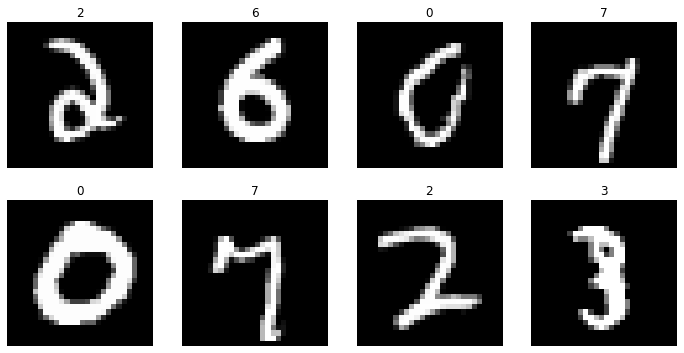

In [53]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [57]:
import torch.nn as nn
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(out)
print(output.size())

tensor([[-0.7996, -1.5584, -0.9684,  ...,  1.2995, -1.1358, -0.3442],
        [-0.0307, -1.9338, -0.5982,  ..., -1.0375,  0.4164,  1.2832],
        [-1.6677, -0.3681, -0.8841,  ...,  1.5290, -0.5452,  1.0157],
        ...,
        [ 0.5910, -1.3246,  0.2137,  ..., -0.1860, -1.4087, -0.2073],
        [ 0.7370,  2.0818,  2.3532,  ...,  0.2118,  0.3350,  0.9778],
        [-0.5526, -2.0114,  2.0858,  ...,  0.6758, -1.1451,  0.3758]])
Linear(in_features=20, out_features=30, bias=True)
tensor(36., grad_fn=<MeanBackward0>)
torch.Size([128, 30])


In [73]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [74]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [75]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


In [76]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [77]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [78]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [80]:
# weight는 detach() 후 넘파이로 변환
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

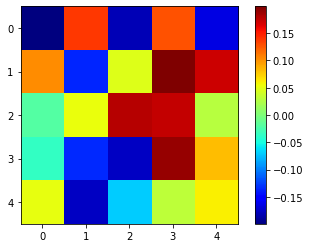

In [66]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [68]:
print(images.shape)
print(images[0].size())
input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [85]:
input_data =torch.unsqueeze(images[0],dim=0)
print(input_data.size()) # 흑백사진 1장

output_data = layer(input_data)
output = output_data.data 
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

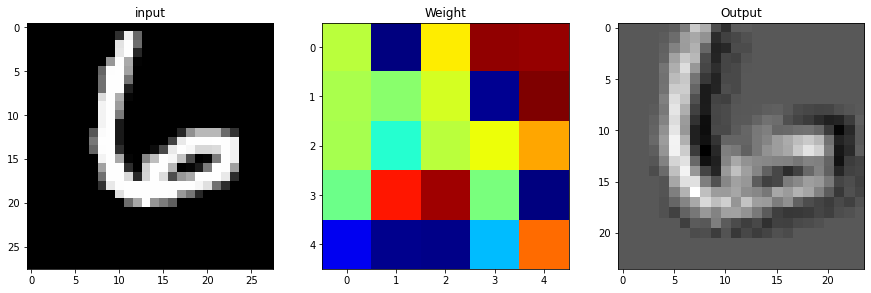

In [82]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

In [86]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [87]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

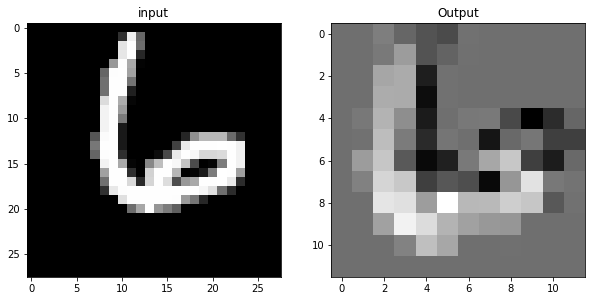

In [89]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [90]:
# Flatten()
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [91]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [92]:
lin

tensor([[ 0.3642,  0.1513, -0.0701, -0.2964,  0.4223,  0.0287,  0.1303,  0.1456,
          0.2693, -0.0620]], grad_fn=<AddmmBackward0>)

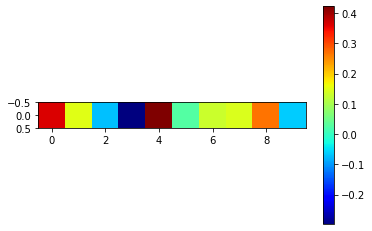

In [93]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

In [94]:
with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)
softmax 

tensor([[0.1281, 0.0787, 0.0685, 0.1051, 0.1387, 0.1013, 0.0693, 0.0705, 0.1240,
         0.1159]])

In [95]:
import numpy as np
np.sum(softmax.numpy())

1.0

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [98]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### FashionMNIST 분류 모델

In [99]:
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [100]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [101]:
train_loader = DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)
test_loader = DataLoader(testset,batch_size=128,shuffle=True,num_workers=2)

In [102]:
images, labels = next(iter(train_loader)) # 데이터에 접근하려면 python의 내장함수 iter와 next를 사용
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

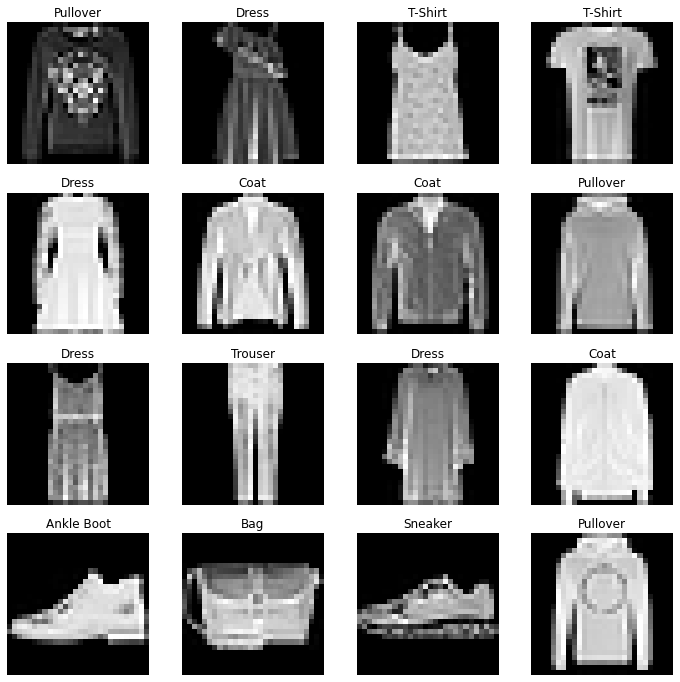

In [104]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}
figure = plt.figure(figsize=(12,12))
cols,rows = 4,4
for i in range(1,cols*rows+1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()


In [ ]:
# 모델 정의 및 파라미터
import torch.nn.functional as F 
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    